In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Feature Engineering

In [2]:
df = pd.read_excel('medicare_fraud_cleaned.xlsx')
df

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,N_Procedure,N_UniqueDiagnosis_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,PRV51001,24,25,104640,5340,8,25,5,10,30,...,65380,11598,0,40,3,91,12,12,87,0
1,PRV51003,117,132,605670,66286,29,132,45,25,382,...,353520,97300,1,202,48,761,12,12,78,1
2,PRV51004,138,149,52170,310,23,149,27,63,0,...,327040,92790,1,239,0,410,12,12,80,0
3,PRV51005,495,1165,280910,3700,259,1163,222,478,0,...,2457840,741323,4,1863,0,3246,12,12,78,1
4,PRV51007,58,72,33710,3264,11,72,12,26,19,...,124540,33820,1,110,1,231,12,12,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,24,28,10640,130,5,28,1,12,0,...,90770,24830,0,41,0,61,12,12,82,0
5406,PRV57760,9,22,4770,0,0,22,6,9,0,...,32840,17720,0,37,0,59,12,12,69,0
5407,PRV57761,67,82,18470,370,23,82,14,36,0,...,240130,58000,1,132,0,235,12,12,80,0
5408,PRV57762,1,1,1900,0,0,1,0,0,0,...,2540,400,0,1,0,2,12,12,76,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Provider                         5410 non-null   object
 1   BeneID_count                     5410 non-null   int64 
 2   ClaimID_count                    5410 non-null   int64 
 3   InscClaimAmtReimbursed           5410 non-null   int64 
 4   DeductibleAmtPaid                5410 non-null   int64 
 5   RenalDiseaseIndicator            5410 non-null   int64 
 6   AttendingPhysician               5410 non-null   int64 
 7   OperatingPhysician               5410 non-null   int64 
 8   OtherPhysician                   5410 non-null   int64 
 9   AdmitForDays                     5410 non-null   int64 
 10  ChronicCond_Alzheimer            5410 non-null   int64 
 11  ChronicCond_Heartfailure         5410 non-null   int64 
 12  ChronicCond_Cancer               5

# Handling missing value 

In [4]:
df.isnull().sum()

Provider                           0
BeneID_count                       0
ClaimID_count                      0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
RenalDiseaseIndicator              0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
AdmitForDays                       0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_Cancer                 0
ChronicCond_KidneyDisease          0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
WhetherDead                        0
N_Types_Physicians                 0
N

# Data Visualization

#Bivariate Analysis 

In [5]:
df.describe()

,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,ChronicCond_Alzheimer,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,N_Procedure,N_UniqueDiagnosis_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
count,5410.000000,5410.000000,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,...,5.410000e+03,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,67.153420,103.181331,1.028730e+05,8078.560444,20.304621,102.902588,21.154713,36.919778,49.864325,41.465250,...,2.350703e+05,6.703678e+04,0.763586,160.977079,5.526063,334.219778,11.946950,11.957856,81.673567,0.093530
std,142.748729,272.456989,2.687367e+05,24924.637743,52.634207,271.698637,51.701440,103.681266,159.883542,109.109322,...,6.339728e+05,1.812672e+05,2.314464,424.957609,17.598724,817.920498,0.401461,0.322449,4.733683,0.291201
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000
25%,8.000000,10.000000,4.460000e+03,10.000000,2.000000,10.000000,2.000000,3.000000,0.000000,4.000000,...,1.818250e+04,5.500000e+03,0.000000,15.000000,0.000000,34.000000,12.000000,12.000000,80.000000,0.000000
50%,25.000000,31.000000,1.980500e+04,310.000000,6.000000,31.000000,7.000000,11.000000,0.000000,12.000000,...,6.566000e+04,1.908000e+04,0.000000,49.000000,0.000000,107.000000,12.000000,12.000000,82.000000,0.000000
75%,65.000000,87.000000,8.556500e+04,5340.000000,18.000000,87.000000,19.000000,30.000000,32.000000,36.000000,...,1.997150e+05,5.693000e+04,1.000000,137.000000,4.000000,296.750000,12.000000,12.000000,84.000000,0.000000
max,2857.000000,8240.000000,5.996050e+06,539426.000000,1447.000000,8207.000000,1441.000000,3209.000000,3568.000000,3282.000000,...,1.909821e+07,5.456830e+06,52.000000,12857.000000,394.000000,23118.000000,12.000000,12.000000,109.000000,1.000000


# Feature Transformation

# LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
df1=df.copy()

In [8]:
df["Provider"]=LabelEncoder().fit_transform(df.Provider)

In [9]:
df

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,N_Procedure,N_UniqueDiagnosis_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,0,24,25,104640,5340,8,25,5,10,30,...,65380,11598,0,40,3,91,12,12,87,0
1,1,117,132,605670,66286,29,132,45,25,382,...,353520,97300,1,202,48,761,12,12,78,1
2,2,138,149,52170,310,23,149,27,63,0,...,327040,92790,1,239,0,410,12,12,80,0
3,3,495,1165,280910,3700,259,1163,222,478,0,...,2457840,741323,4,1863,0,3246,12,12,78,1
4,4,58,72,33710,3264,11,72,12,26,19,...,124540,33820,1,110,1,231,12,12,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,5405,24,28,10640,130,5,28,1,12,0,...,90770,24830,0,41,0,61,12,12,82,0
5406,5406,9,22,4770,0,0,22,6,9,0,...,32840,17720,0,37,0,59,12,12,69,0
5407,5407,67,82,18470,370,23,82,14,36,0,...,240130,58000,1,132,0,235,12,12,80,0
5408,5408,1,1,1900,0,0,1,0,0,0,...,2540,400,0,1,0,2,12,12,76,0


In [10]:
x_idep = df.drop('PotentialFraud',axis=1)
x_idep

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,N_Procedure,N_UniqueDiagnosis_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age
0,0,24,25,104640,5340,8,25,5,10,30,...,22428,65380,11598,0,40,3,91,12,12,87
1,1,117,132,605670,66286,29,132,45,25,382,...,122948,353520,97300,1,202,48,761,12,12,78
2,2,138,149,52170,310,23,149,27,63,0,...,64808,327040,92790,1,239,0,410,12,12,80
3,3,495,1165,280910,3700,259,1163,222,478,0,...,441724,2457840,741323,4,1863,0,3246,12,12,78
4,4,58,72,33710,3264,11,72,12,26,19,...,32040,124540,33820,1,110,1,231,12,12,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,5405,24,28,10640,130,5,28,1,12,0,...,12816,90770,24830,0,41,0,61,12,12,82
5406,5406,9,22,4770,0,0,22,6,9,0,...,9612,32840,17720,0,37,0,59,12,12,69
5407,5407,67,82,18470,370,23,82,14,36,0,...,48060,240130,58000,1,132,0,235,12,12,80
5408,5408,1,1,1900,0,0,1,0,0,0,...,1068,2540,400,0,1,0,2,12,12,76


In [11]:
y_dep=df['PotentialFraud']
y_dep

0       0
1       1
2       0
3       1
4       0
       ..
5405    0
5406    0
5407    0
5408    0
5409    0
Name: PotentialFraud, Length: 5410, dtype: int64

# Feature Selection

# Information gain - mutual information In Classification

In [12]:
## It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_idep,y_dep,
    test_size=0.2,
    random_state=0)

In [13]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

InscClaimAmtReimbursed             0.146511
DeductibleAmtPaid                  0.128859
AdmitForDays                       0.117895
N_Procedure                        0.113929
IPAnnualReimbursementAmt           0.100985
N_UniqueDiagnosis_Claims           0.098294
IPAnnualDeductibleAmt              0.095108
OperatingPhysician                 0.094580
ChronicCond_KidneyDisease          0.078850
ChronicCond_ObstrPulmonary         0.076985
ChronicCond_IschemicHeart          0.074226
RenalDiseaseIndicator              0.072867
ChronicCond_stroke                 0.071731
ChronicCond_Alzheimer              0.071224
N_Types_Physicians                 0.069741
OPAnnualReimbursementAmt           0.068442
AttendingPhysician                 0.067426
ChronicCond_Osteoporasis           0.064854
ChronicCond_rheumatoidarthritis    0.064728
ClaimID_count                      0.064024
ChronicCond_Cancer                 0.063536
BeneID_count                       0.063112
ChronicCond_Heartfailure        

<AxesSubplot:>

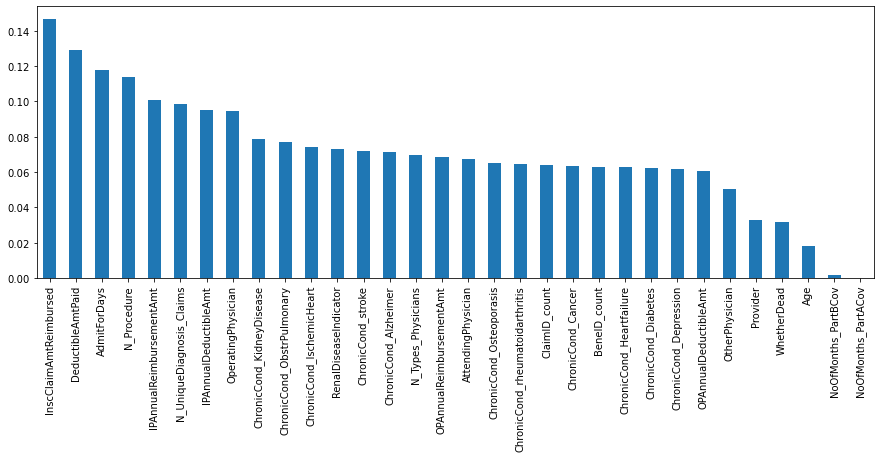

In [15]:

mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [16]:
from sklearn.feature_selection import SelectKBest

In [17]:
#No we Will select the  top 10 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]


Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator',
       'OperatingPhysician', 'AdmitForDays', 'ChronicCond_KidneyDisease',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'N_Procedure',
       'N_UniqueDiagnosis_Claims'],
      dtype='object')

# Chi Square Test

In [18]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [19]:
f_p_values

(array([5.95421356e+01, 1.96753905e+05, 4.36052199e+05, 1.02490974e+09,
        9.67022852e+07, 9.09300590e+04, 4.34952360e+05, 1.09691473e+05,
        1.47122364e+05, 6.30431420e+05, 1.81256257e+05, 2.65867811e+05,
        6.77146718e+04, 1.92690509e+05, 1.45238782e+05, 1.89238132e+05,
        3.11661975e+05, 3.37074205e+05, 1.38904814e+05, 1.40287613e+05,
        5.00681988e+04, 2.94953547e+09, 3.18523221e+08, 1.00052398e+09,
        2.87585031e+08, 2.85085351e+03, 6.90635790e+05, 6.97935051e+04,
        1.69699229e+06, 4.67613400e-02, 5.56120511e-02, 2.20149475e-03]),
 array([1.19703546e-14, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

In [20]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns

In [21]:
p_values.sort_index(ascending=False)

WhetherDead                        0.000000e+00
RenalDiseaseIndicator              0.000000e+00
Provider                           1.197035e-14
OtherPhysician                     0.000000e+00
OperatingPhysician                 0.000000e+00
OPAnnualReimbursementAmt           0.000000e+00
OPAnnualDeductibleAmt              0.000000e+00
NoOfMonths_PartBCov                8.135707e-01
NoOfMonths_PartACov                8.287978e-01
N_UniqueDiagnosis_Claims           0.000000e+00
N_Types_Physicians                 0.000000e+00
N_Procedure                        0.000000e+00
InscClaimAmtReimbursed             0.000000e+00
IPAnnualReimbursementAmt           0.000000e+00
IPAnnualDeductibleAmt              0.000000e+00
DeductibleAmtPaid                  0.000000e+00
ClaimID_count                      0.000000e+00
ChronicCond_stroke                 0.000000e+00
ChronicCond_rheumatoidarthritis    0.000000e+00
ChronicCond_Osteoporasis           0.000000e+00
ChronicCond_ObstrPulmonary         0.000

In [22]:
# # As we found in mutual_info_classification the fields are considered for analysis, 
# # so we drop only (Diabetes, Visited_Public_Exposed_Places, Gastrointestinal, Chronic_Lung_Disease, Heart_Disease)
# # which has no relationship with dependent variable or very less with this data set alone
df=df.drop(['Age','NoOfMonths_PartBCov','NoOfMonths_PartACov','AttendingPhysician','AdmitForDays'] ,axis=1)
x_idep=x_idep.drop(['Age','NoOfMonths_PartBCov','NoOfMonths_PartACov','AttendingPhysician','AdmitForDays'] ,axis=1)
# df=df.drop('Sanitization_from_Market', axis=1)

In [23]:
# x_idep=x_idep.drop('Gastrointestinal ', axis=1)
# x_idep=x_idep.drop('Sanitization_from_Market', axis=1)

-------

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x_idep,y_dep,test_size=0.2,random_state=20)

In [26]:
# pip install imblearn

In [27]:
import imblearn

In [28]:
x_idep

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,OperatingPhysician,OtherPhysician,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,N_Procedure,N_UniqueDiagnosis_Claims
0,0,24,25,104640,5340,8,5,10,15,19,...,8,6,440150,22428,65380,11598,0,40,3,91
1,1,117,132,605670,66286,29,45,25,56,80,...,38,12,999000,122948,353520,97300,1,202,48,761
2,2,138,149,52170,310,23,27,63,64,88,...,46,17,648430,64808,327040,92790,1,239,0,410
3,3,495,1165,280910,3700,259,222,478,426,680,...,331,124,4221950,441724,2457840,741323,4,1863,0,3246
4,4,58,72,33710,3264,11,12,26,26,40,...,22,12,219600,32040,124540,33820,1,110,1,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,5405,24,28,10640,130,5,1,12,14,20,...,9,4,110940,12816,90770,24830,0,41,0,61
5406,5406,9,22,4770,0,0,6,9,3,11,...,1,0,61280,9612,32840,17720,0,37,0,59
5407,5407,67,82,18470,370,23,14,36,36,56,...,24,10,576180,48060,240130,58000,1,132,0,235
5408,5408,1,1,1900,0,0,0,0,0,0,...,0,0,15000,1068,2540,400,0,1,0,2


In [29]:
y_dep

0       0
1       1
2       0
3       1
4       0
       ..
5405    0
5406    0
5407    0
5408    0
5409    0
Name: PotentialFraud, Length: 5410, dtype: int64

In [30]:
from collections import Counter

In [31]:
counter=Counter(y_dep)
counter

Counter({0: 4904, 1: 506})

In [32]:
from imblearn.over_sampling import SMOTE
bal=SMOTE()

In [33]:
x_idep, y_dep= bal.fit_resample(x_idep, y_dep)

In [34]:
y_dep.value_counts()

1    4904
0    4904
Name: PotentialFraud, dtype: int64

# Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x_idep,y_dep, test_size=0.2)

In [37]:
x_idep

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,OperatingPhysician,OtherPhysician,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,N_Procedure,N_UniqueDiagnosis_Claims
0,0,24,25,104640,5340,8,5,10,15,19,...,8,6,440150,22428,65380,11598,0,40,3,91
1,1,117,132,605670,66286,29,45,25,56,80,...,38,12,999000,122948,353520,97300,1,202,48,761
2,2,138,149,52170,310,23,27,63,64,88,...,46,17,648430,64808,327040,92790,1,239,0,410
3,3,495,1165,280910,3700,259,222,478,426,680,...,331,124,4221950,441724,2457840,741323,4,1863,0,3246
4,4,58,72,33710,3264,11,12,26,26,40,...,22,12,219600,32040,124540,33820,1,110,1,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9803,617,868,1598,486153,8965,315,288,608,589,908,...,483,179,7300680,801310,3634264,1062863,10,2490,3,4514
9804,4332,121,254,105570,6057,54,38,113,112,151,...,108,15,1031068,119510,515154,128933,1,405,3,764
9805,2566,13,13,143841,13884,2,9,0,7,12,...,6,3,216087,21724,17529,3938,0,23,9,126
9806,1755,358,452,1019797,113134,102,133,129,194,275,...,165,59,2660453,346638,1154887,334897,7,714,87,1995


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model=LogisticRegression()
modelfit = model.fit(xtrain,ytrain)

In [40]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [41]:
Predict_model0=modelfit.predict(xtest)

In [42]:
confusion_matrix(ytest,Predict_model0)

array([[851, 128],
       [160, 823]])

In [43]:
lr_acc=(accuracy_score(ytest,Predict_model0)*100,"%")
lr_acc

(85.3211009174312, '%')

In [44]:
# classification report

In [45]:
import sklearn
from sklearn.metrics import classification_report 

In [46]:
classification_reports=print(classification_report(ytest,Predict_model0))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       979
           1       0.87      0.84      0.85       983

    accuracy                           0.85      1962
   macro avg       0.85      0.85      0.85      1962
weighted avg       0.85      0.85      0.85      1962



# Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn import preprocessing

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [51]:
model_GB = GradientBoostingClassifier()

In [52]:
# gbm = GridSearchCV(model_GB,
#                      param_grid = {'max_depth': range(1, 15),
#                                   'min_samples_split': range(1, 11, 3)},
#                      cv=5,
#                      n_jobs=-1,
#                      scoring='accuracy', 
# #                    refit=True,
#                   )
                      
# gbm.fit(xtrain, ytrain)

# print(gbm.best_params_)
# print(gbm.best_score_)

In [53]:
# Initiate the best model
model_GB = GradientBoostingClassifier(max_depth=14, min_samples_split=10)

In [54]:
# Fit the best model
model_GB_fit=model_GB.fit(xtrain, ytrain)

In [55]:
Predict_model1 = model_GB_fit.predict(xtest)

In [56]:
confusion_matrix(ytest,Predict_model1)

array([[907,  72],
       [ 25, 958]])

In [57]:
gbm_acc=(accuracy_score(ytest,Predict_model1)*100,"%")
gbm_acc

(95.05606523955149, '%')

In [58]:
classification_reports=print(classification_report(ytest,Predict_model1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       979
           1       0.93      0.97      0.95       983

    accuracy                           0.95      1962
   macro avg       0.95      0.95      0.95      1962
weighted avg       0.95      0.95      0.95      1962



__________

# eXtreme Gradient Boosting

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb = XGBClassifier()

In [61]:
# best_xgb = GridSearchCV(xgb,
#                      param_grid = {'max_depth': range(1, 15),
#                                   'min_samples_split': range(1, 15)},
#                      cv=5,
#                      n_jobs=-1,
#                      scoring='accuracy',
# #                         refit=True
#                        )
                      
# best_xgb.fit(xtrain, ytrain)

# print(best_xgb.best_params_)
# print(best_xgb.best_score_)

In [62]:
# Initiate the best model
best_xgb = XGBClassifier(max_depth=11, min_samples_split=1)

In [63]:
# Fit the best model
best_xgb_fit=best_xgb.fit(xtrain, ytrain)

In [64]:
Predict_model2 = best_xgb_fit.predict(xtest)

In [65]:
confusion_matrix(ytest,Predict_model2)

array([[912,  67],
       [ 25, 958]])

In [66]:
xgb_acc=(accuracy_score(ytest,Predict_model2)*100,"%")
xgb_acc

(95.31090723751274, '%')

In [67]:
classification_reports=print(classification_report(ytest,Predict_model2))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       979
           1       0.93      0.97      0.95       983

    accuracy                           0.95      1962
   macro avg       0.95      0.95      0.95      1962
weighted avg       0.95      0.95      0.95      1962



# K_Nearest_Neighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn_model = knn.fit(xtrain,ytrain)

In [71]:
Predict_model3 = knn_model.predict(xtest)

In [72]:
confusion_matrix(ytest,Predict_model3)

array([[851, 128],
       [ 33, 950]])

In [73]:
knn_acc=(accuracy_score(ytest,Predict_model3)*100,"%")
knn_acc

(91.7940876656473, '%')

In [74]:
classification_reports=print(classification_report(ytest,Predict_model3))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       979
           1       0.88      0.97      0.92       983

    accuracy                           0.92      1962
   macro avg       0.92      0.92      0.92      1962
weighted avg       0.92      0.92      0.92      1962



______

# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Initiate the model
dt = DecisionTreeClassifier()

In [77]:
# # Grid search
# dt_gs = GridSearchCV(dt,param_grid = {'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10)},
#                      cv=5,n_jobs=-1,
#                      scoring='accuracy',
# #                      refit=True
#                     )

In [78]:
# dt_gs.fit(xtrain, ytrain)

In [79]:
# print(dt_gs.best_params_)
# print(dt_gs.best_score_)

In [80]:
# Initiate the best model
dt_best_model = DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [81]:
# Fit the best model
Decision_model_fit=dt_best_model.fit(xtrain, ytrain)

In [82]:
Predict_model4 = Decision_model_fit.predict(xtest)

In [83]:
confusion_matrix(ytest,Predict_model4)

array([[849, 130],
       [ 49, 934]])

In [84]:
dt_acc=(accuracy_score(ytest,Predict_model4)*100,"%")
dt_acc

(90.87665647298675, '%')

In [85]:
classification_reports=print(classification_report(ytest,Predict_model4))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90       979
           1       0.88      0.95      0.91       983

    accuracy                           0.91      1962
   macro avg       0.91      0.91      0.91      1962
weighted avg       0.91      0.91      0.91      1962



# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
Random_model = RandomForestClassifier()

In [88]:
# # Grid search
# rf_gs = GridSearchCV(Random_model,param_grid = {'max_depth': range(1, 15),'min_samples_split': range(10, 15, 1),
#                       "max_features" : ["auto", "log2", "sqrt"]},
#                      cv=5,n_jobs=-1,
#                      scoring='accuracy',
# #                      refit=True
#                     )

In [89]:
# rf_gs.fit(xtrain, ytrain)

In [90]:
# print(rf_gs.best_params_)
# print(rf_gs.best_score_)

In [91]:
# Initiate the best model
rf_best_model = RandomForestClassifier(max_depth= 9, max_features= 'auto', min_samples_split= 10)

In [92]:
# Fit the best model
Random_model=rf_best_model.fit(xtrain, ytrain)

In [93]:
Predict_model5 = Random_model.predict(xtest)

In [94]:
confusion_matrix(ytest,Predict_model5)

array([[874, 105],
       [ 47, 936]])

In [95]:
rf_acc=(accuracy_score(ytest,Predict_model5)*100,"%")
rf_acc

(92.25280326197758, '%')

In [96]:
classification_reports=print(classification_report(ytest,Predict_model5))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       979
           1       0.90      0.95      0.92       983

    accuracy                           0.92      1962
   macro avg       0.92      0.92      0.92      1962
weighted avg       0.92      0.92      0.92      1962



_________

# Gradio

In [97]:
import gradio as gd

In [98]:
df.columns

Index(['Provider', 'BeneID_count', 'ClaimID_count', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'RenalDiseaseIndicator', 'OperatingPhysician',
       'OtherPhysician', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_Cancer', 'ChronicCond_KidneyDisease',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'WhetherDead', 'N_Types_Physicians',
       'N_Procedure', 'N_UniqueDiagnosis_Claims', 'PotentialFraud'],
      dtype='object')

In [99]:
Provider = gd.inputs.Dropdown(['PRV51001', 'PRV51003', 'PRV51004', 'PRV51005', 'PRV51007',
       'PRV51008', 'PRV51011', 'PRV51012', 'PRV51013', 'PRV51014',
       'PRV51015', 'PRV51016', 'PRV51017', 'PRV51021', 'PRV51023',
       'PRV51024', 'PRV51025', 'PRV51026', 'PRV51027', 'PRV51029',
       'PRV51030', 'PRV51031', 'PRV51032', 'PRV51035', 'PRV51036',
       'PRV51037', 'PRV51038', 'PRV51040', 'PRV51041', 'PRV51042',
       'PRV51043', 'PRV51044', 'PRV51045', 'PRV51046', 'PRV51047',
       'PRV51048', 'PRV51049', 'PRV51052', 'PRV51053', 'PRV51054',
       'PRV51055', 'PRV51056', 'PRV51057', 'PRV51058', 'PRV51059',
       'PRV51060', 'PRV51061', 'PRV51062', 'PRV51063', 'PRV51064'],label='Provider')

In [100]:
BeneID_count = gd.inputs.Dropdown([24, 117, 138, 495,  58,  36,  53,  31,  44,  25,   7,   6, 420,
       208,  35,  38,  76,  56,  79, 145, 157,  21, 131, 206, 107,  69,
       128,  20,  39,  29,  26,  11,  33,  65,  37,   1,  40,  22,   4,
        75,  82,  42,  67, 166, 115, 227],label='BeneID_count')

In [101]:
ClaimID_count = gd.inputs.Dropdown([25,  132,  149, 1165,   72,   43,   58,   48,   46,   30,    8,
          6,  515,  257,   36,   39,   87,   76,   53,   93,  171,  185,
         23,  278,  454,  141,   86,   34,  142,   59,   31,   38,   11,
         71,    1,   57,   22,    5,   83,   96,   42,  145,  397,  303],label='ClaimID_count')

In [102]:
InscClaimAmtReimbursed = gd.inputs.Dropdown([104640, 605670,  52170, 280910,  33710,  35630,  16630,  16890,
        14880,  10480,    700,    170, 142720, 348830,  65610,  64050,
       118350,  19840,  29840,  30660, 739760, 359720,   5420,  32560,
        74880, 342230, 265490,  74470,   7410,  48050,   4480,  21330,
         8390, 109370,   2530,  27700,  21720,  30800,   8000,  15130,
        21640,  14700,   6830, 107030, 421060,  43710,  54940, 153380,
        51110, 360320],label='InscClaimAmtReimbursed')

In [103]:
DeductibleAmtPaid = gd.inputs.Dropdown([5340, 66286,   310,  3700,  3264,  2316,  1368,   100,   230,
         120,     0,  1050, 31492,  8624,  9702, 14284,   340,   160,
       86748, 30244,    50,  1428,  1410, 25524, 31192,  8784,   270,
         130,    40,  8644,  4352,   190,  2346,  1068,   140,  2206,
        2146,  5540, 26940,  1328,  3944, 38948],label='DeductibleAmtPaid')

In [104]:
ChronicCond_Alzheimer = gd.inputs.Dropdown([15,  56,  64, 426,  26,  17,  25,  18,  16,   4,   2, 216,  94,
        28,  30,  23,  32,  73,  90,   9,   8,  99, 195,  70,  35,  50,
        22,  14,   3,  33,   0,  21,  10,  31,  36, 175,  63, 110],label='ChronicCond_Alzheimer')

In [105]:
RenalDiseaseIndicator = gd.inputs.Dropdown([ 8,  29,  23, 259,  11,  10,  12,   7,   3,   1,  85,  57,  19,
        16,  13,  47,  39,  44,  66,  32,  22,   6,   4,   0,  17,   9,
         5,  14,  18,  30, 107,  35,  63],label='RenalDiseaseIndicator')

In [106]:
OperatingPhysician = gd.inputs.Dropdown([ 5,  45,  27, 222,  12,   6,   8,  11,  10,   1,  95,  53,  13,
        26,  18,  59,  40,   9,  51,  88,  32,  20,  35,   2,   7,  15,
        28,  72,  25,  66],label='OperatingPhysician')

In [107]:
OtherPhysician = gd.inputs.Dropdown([10,  25,  63, 478,  26,  17,  21,  16,  15,  20,   4,   0, 201,
        82,  19,  12,  34,  31,  35,   9, 119, 157,  43,  28,  11,  55,
        27,   6,  13,  24,   1,   8,   3,  36,  30,  66, 143, 115],label='OtherPhysician')

In [108]:
ChronicCond_KidneyDisease = gd.inputs.Dropdown([17,  64,  50, 507,  22,  14,  25,  19,  16,   4, 215, 122,  23,
        40,  30,  27,  33,  81,  89,  10,  18, 109, 181,  65,   7,  58,
        15,  12,   1,   8,  34,  38, 190,  68, 139],label='ChronicCond_KidneyDisease')

In [109]:
ChronicCond_Heartfailure = gd.inputs.Dropdown([19,  80,  88, 680,  40,  25,  37,  26,  17,   7,   4, 294, 145,
        21,  47,  33,  36,  45, 111, 128,  15,  18, 159, 271,  54,  74,
        16,  34,   6,  22,  29,   1,  28,  13,  44,  62, 241,  91, 191],label='ChronicCond_Heartfailure')

In [110]:
ChronicCond_Cancer = gd.inputs.Dropdown([ 5,  10,  16, 165,  12,   9,   4,   6,   2,   3,  58,  60,  13,
        11,  30,  19,  31, 104,  27,   7,  20,   0,  15,  21,  68,  39,
         1,  17,  25,   8,  33,  18,  42,  35],label='ChronicCond_Cancer')

In [111]:
ChronicCond_ObstrPulmonary = gd.inputs.Dropdown([10,  41, 295,  16,   9,  21,   4,   2, 159, 103,  14,  28,  15,
        29,  65,  71,   8,  11,  95, 155,  43,  25,  19,  13,  34,  12,
         0,  20,   6,   1,  23,  39, 120,  44, 107],label='ChronicCond_ObstrPulmonary')

In [112]:
ChronicCond_Depression = gd.inputs.Dropdown([9,  54,  63, 485,  29,  12,  31,  19,  18,  10,   7,   2, 210,
       116,  16,  41,  39,  30,  76,  81,  11, 132, 205,  15,  56,  22,
        13,   4,  20,  33,   1,  24,   0,  40,  37,  67, 204,  65, 145],label='ChronicCond_Depression')

In [113]:
ChronicCond_Diabetes = gd.inputs.Dropdown([21, 100, 105, 799,  49,  30,  41,  35,  37,  19,   8,   5, 351,
       194,  64,  56,  62, 125, 130,  16,  22, 201, 311, 109,  63,  87,
        18,  23,  31,   7,  32,  27,   0,  29,  11,  20,   1,  33, 295,
       221],label='ChronicCond_Diabetes')

In [114]:
ChronicCond_IschemicHeart = gd.inputs.Dropdown([23, 112, 108, 895,  51,  33,  44,  38,  36,  20,   7,   5, 386,
       196,  30,  29,  62,  50,  43,  66, 138, 151,  16,  24, 201, 363,
        15,  35,  31,  32,   1,  17,  18, 104, 283, 116, 239],label='ChronicCond_IschemicHeart')

In [115]:
ChronicCond_Osteoporasis = gd.inputs.Dropdown([6,  33,  49, 344,  21,  11,  20,  17,  12,   3,   2, 184,  70,
         9,  31,  10,  48,  85,   4,  95, 168,  46,   7,  22,  15,   8,
         0,  28, 153,  38, 101],label='ChronicCond_Osteoporasis')

In [116]:
ChronicCond_rheumatoidarthritis = gd.inputs.Dropdown([8,  38,  46, 331,  22,   6,  16,  17,  12,   3, 128,  85,  14,
        26,  23,  13,  28,  59,  54,   5,   7,  82, 132,  20,   9,  21,
         4,  19,   0,   2,  37, 101,  41,  92],label='ChronicCond_rheumatoidarthritis')

In [117]:
ChronicCond_stroke = gd.inputs.Dropdown([6,  12,  17, 124,   2,   3,   1,  47,  27,   5,   8,  13,  19,
        29,  14,  11,   0,   4,   7,   9,  10,  51,  16,  41],label='ChronicCond_stroke')

In [118]:
IPAnnualReimbursementAmt = gd.inputs.Dropdown([440150,  999000,  648430, 4221950,  219600,  283460,  256060,
        332900,  167240,   83590,    9490,       0, 1711200, 1255950,
        191530,  178100,  419650,  301800,  330250,  357960, 1274520,
       1136390,  188280,  108160, 1571900, 1811420,  699540,  681080,
         46700,  680390,   72150,  213680,  118990,  223660,   45170,
        160500,  167820,  135260,    8000,  142200,  113570,  147610,
         60000,  450710, 1149970,  158940,  588700, 2807780,  628630,
       1459470],label='IPAnnualReimbursementAmt')

In [119]:
IPAnnualDeductibleAmt = gd.inputs.Dropdown([22428, 122948,  64808, 441724,  32040,  26700,  39108,  40316,
        27292,  12816,   2136,      0, 198512, 149776,  30364,  24564,
        48060,  35040,  37380,  38040, 172608, 131332,  25292,  10680,
       162656, 292700,  88644,  49428,   8544,  69420,  21660,  16020,
        21360,   7272,  17088,  37700,  19224,   1068,  11748,   9612,
        52128,  83692,  75828, 249912,  51264, 174132],label='IPAnnualDeductibleAmt')

In [120]:
OPAnnualReimbursementAmt = gd.inputs.Dropdown([65380,  353520,  327040, 2457840,  124540,  110530,   81160,
        182110,  148420,   52270,   11560,    5270, 1221060,  692640,
         89120,   76950,  199140,  137680,  188920,  154470,  427360,
        345580,   32260,   39960,  575620,  977930,  308950,  209240,
         77780,  339440,   36920,  163460,   61160,   81950,   18290,
         81490,  229400,   97830,      90,  139990,   29570,   78330,
         15690,  178960,  210440,   61470,  478990, 1039960,  447060,
        829960],label='OPAnnualReimbursementAmt')

In [121]:
OPAnnualDeductibleAmt = gd.inputs.Dropdown([11598,  97300,  92790, 741323,  33820,  26490,  21270,  35290,
        42080,  19480,   2110,   1770, 354990, 197902,  27700,  26080,
        54060,  51710,  50200,  45860, 113830, 113450,   9750,  13180,
       142360, 260480,  87840,  51760,  20870,  97120,  12660,  57120,
        16990,  25580,   7620,  21310,  74130,  22970,      0,  49920,
        11050,  21150,   4370,  55110,  37900,  23640, 122390, 297180,
       101475, 222520],label='OPAnnualDeductibleAmt')

In [122]:
WhetherDead = gd.inputs.Dropdown([ 0,  1,  4,  5,  2, 10,  3,  6,  8, 25, 16, 12, 11, 52, 20,  7, 18,
       17,  9, 31, 14],label='WhetherDead')

In [123]:
N_Types_Physicians = gd.inputs.Dropdown([40,  202,  239, 1863,  110,   66,   91,   71,   72,   59,   13,
          7,  809,  391,   67,   64,  146,  118,   81,  142,  265,  288,
         37,   49,  448,  696,  216,  132,   51,  232,   35,   98,   52,
         18,   58,  108,    3,   86,   41,   10,  134,  152,  238,  612,
        174,  484],label='N_Types_Physicians')

In [124]:
df['N_UniqueDiagnosis_Claims'].head(50).unique()

array([  91,  761,  410, 3246,  231,  143,  158,  139,  128,  115,   25,
         23, 1500,  955,  175,  153,  346,  192,  138,  281,  965,  670,
         61,   79,  769, 1456,  507,  318,   90,  388,   48,  152,   87,
        142,  120,  198,  162,   10,  154,   85,   68,   21,  292,  429,
        157,  397, 1167,  412, 1092])

In [125]:
N_Procedure = gd.inputs.Dropdown([3,  48,   0,   1,   2,  22,   5,   7,  12,  57,  25,  13,  15,
        24,  26,   9,   6,   8,  14,  17,   4,  11,  75,  10, 130, 112,
        31,  83,  42,  67,  27, 148,  32,  20,  18,  90, 127,  53,  49,
        66,  76, 113,  37,  16,  64,  55,  68,  33, 154,  56,  43, 101],label='N_Procedure')

In [126]:
N_UniqueDiagnosis_Claims = gd.inputs.Dropdown([91,  761,  410, 3246,  231,  143,  158,  139,  128,  115,   25,
         23, 1500,  955,  175,  153,  346,  192,  138,  281,  965,  670,
         61,   79,  769, 1456,  507,  318,   90,  388,   48,  152,   87,
        142,  120,  198,  162,   10,  154,   85,   68,   21,  292,  429,
        157,  397, 1167,  412, 1092],label='N_UniqueDiagnosis_Claims')

In [127]:
xtest

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,OperatingPhysician,OtherPhysician,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,N_Procedure,N_UniqueDiagnosis_Claims
5051,5051,5,5,37000,5340,2,3,0,3,5,...,2,1,118170,22884,9060,2090,0,8,4,49
5406,5406,9,22,4770,0,0,6,9,3,11,...,1,0,61280,9612,32840,17720,0,37,0,59
4537,4537,19,25,4170,100,3,6,11,5,17,...,8,3,39060,6408,43960,10350,0,42,0,81
6038,2114,1120,2025,591640,7732,421,342,766,839,1174,...,634,195,9005233,1034630,4682927,1393909,16,3128,1,5724
1784,1784,47,49,415300,51264,12,29,7,29,35,...,16,11,727100,85236,114310,37880,1,85,34,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,851,181,184,56860,240,28,39,74,76,117,...,75,15,652220,77924,476350,126680,0,297,0,508
6648,3740,68,95,211514,22934,18,24,25,35,63,...,32,13,772813,96074,156337,47299,0,144,16,400
1757,1757,51,149,40610,300,51,28,70,67,116,...,66,15,626580,123140,317300,67200,2,246,0,445
1514,1514,19,19,2450,0,7,0,7,8,12,...,8,2,29180,6408,37470,7890,0,26,0,47


In [128]:
def mod(Provider, BeneID_count,ClaimID_count, InscClaimAmtReimbursed,
       DeductibleAmtPaid, RenalDiseaseIndicator, OperatingPhysician,
       OtherPhysician, ChronicCond_Alzheimer, ChronicCond_Heartfailure,
       ChronicCond_Cancer, ChronicCond_KidneyDisease,
       ChronicCond_ObstrPulmonary, ChronicCond_Depression,
       ChronicCond_Diabetes, ChronicCond_IschemicHeart,
       ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis,
       ChronicCond_stroke, IPAnnualReimbursementAmt,
       IPAnnualDeductibleAmt, OPAnnualReimbursementAmt,
       OPAnnualDeductibleAmt, WhetherDead, N_Types_Physicians,
       N_Procedure, N_UniqueDiagnosis_Claims ):
    x1 = [Provider, BeneID_count,ClaimID_count, InscClaimAmtReimbursed,
       DeductibleAmtPaid, RenalDiseaseIndicator, OperatingPhysician,
       OtherPhysician, ChronicCond_Alzheimer, ChronicCond_Heartfailure,
       ChronicCond_Cancer, ChronicCond_KidneyDisease,
       ChronicCond_ObstrPulmonary, ChronicCond_Depression,
       ChronicCond_Diabetes, ChronicCond_IschemicHeart,
       ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis,
       ChronicCond_stroke, IPAnnualReimbursementAmt,
       IPAnnualDeductibleAmt, OPAnnualReimbursementAmt,
       OPAnnualDeductibleAmt, WhetherDead, N_Types_Physicians,
       N_Procedure, N_UniqueDiagnosis_Claims ]
    test=pd.read_excel('medicare_fraud_cleaned.xlsx')
    test=test.drop(['Age','NoOfMonths_PartBCov','NoOfMonths_PartACov','AttendingPhysician','AdmitForDays','PotentialFraud'] ,axis=1)
    x1 =pd.DataFrame(np.array(x1).reshape(1,-1),columns=test.columns)
    test = test.append(x1,ignore_index = True)
    test['Provider'] = LabelEncoder().fit_transform(test['Provider'])
    x2 = test.iloc[-1,:]
    y_hat =  model_GB_fit.predict(np.array(x2).reshape(1,-1))
    pred={0:"NO", 1:"YES"}
    return pred[y_hat[0]]

In [129]:
mod('PRV51001',2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7)

'NO'

In [130]:
gd.Interface(mod, [Provider, BeneID_count,ClaimID_count, InscClaimAmtReimbursed,
       DeductibleAmtPaid, RenalDiseaseIndicator, OperatingPhysician,
       OtherPhysician, ChronicCond_Alzheimer, ChronicCond_Heartfailure,
       ChronicCond_Cancer, ChronicCond_KidneyDisease,
       ChronicCond_ObstrPulmonary, ChronicCond_Depression,
       ChronicCond_Diabetes, ChronicCond_IschemicHeart,
       ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis,
       ChronicCond_stroke, IPAnnualReimbursementAmt,
       IPAnnualDeductibleAmt, OPAnnualReimbursementAmt,
       OPAnnualDeductibleAmt, WhetherDead, N_Types_Physicians,
       N_Procedure, N_UniqueDiagnosis_Claims ],
             gd.outputs.Textbox(label='Potential Fraud')).launch()


Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


Tip: Add interpretation to your model by simply adding `interpretation="default"` to `Interface()`


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

---------

In [131]:
L_R = {'Accuracy':lr_acc}
G_B_M = {'Accuracy':gbm_acc}
e_G_B = {'Accuracy':xgb_acc}
K_N_N = {'Accuracy':knn_acc}
D_t  = {'Accuracy':dt_acc}
R_f  = {'Accuracy':rf_acc}

In [132]:
DataFrame = pd.DataFrame(data=[L_R,G_B_M,e_G_B,K_N_N,D_t,R_f],
                         index=["Logistic Regression", "Gradient Boosting Classifier","eXtreme Gradient Boosting Classifier",
                                "K Nearest Neighbour Classifier",'Decision Tree Classifier',
                                "Random forest Classifier "])

DataFrame

,Accuracy
Logistic Regression,"(85.3211009174312, %)"
Gradient Boosting Classifier,"(95.05606523955149, %)"
eXtreme Gradient Boosting Classifier,"(95.31090723751274, %)"
K Nearest Neighbour Classifier,"(91.7940876656473, %)"
Decision Tree Classifier,"(90.87665647298675, %)"
Random forest Classifier,"(92.25280326197758, %)"
